##  2.1. ECOS API 이용

한국은행은 국내외 경제 전반에 관한 심도깊은 조사분석을 수행하며 관련된 각종 통계를 작성 및 발표하고 있습니다. 통계는 한국은행 경제통계시스템(ECOS)을 통해 접근이 가능한데요. 이번 장에서는 ECOS의 오픈 API 기능을 활용해 대용량의 각종 통계들을 Python을 이용하여 불러오는 방법을 알아봅니다.

API는 Application Programming Interface의 줄임말로, 어플리케이션의 기능 수행에 필요한 규칙(함수)을 정의한 것을 의미합니다. 예를 들어 음성인식 텔레비전의 전원을 끄고 싶을 때 "전원 꺼주세요"라고 말하면 되는데, 이는 제조사가 '전원을 꺼달라는 사용자의 말을 인식하면 티비의 전원을 끈다'라는 규칙을 미리 만들어두었기 때문입니다. 제조사가 이러한 규칙을 미리 만들어두었듯 API는 어플리케이션 개발자가 사용자 편의 등을 위해 만들어놓은 함수입니다.

자, 우선 한국은행 ECOS에 접속해봅시다. https://ecos.bok.or.kr 을 검색해 이동해주세요.

[ECOS 사진 필]

회원가입을 진행하신 후 상단 메뉴바 우측에 위치한 MyPage를 클릭하시면, 발급받으신 인증키를 확인하실 수 있습니다. 잘 작동하는지 간단히 테스트를 해볼까요? 아래의 예제에서 api_key 변수의 값을 본인의 인증키로 바꾸어주세요. B9G993TGPZ8EMO1DY4L5를 인증키로 바꾸어주시면 됩니다.

In [94]:
api_key = 'B9G993TGPZ8EMO1DY4L5'

url = 'http://ecos.bok.or.kr/api/StatisticSearch/{}/json/kr/1/10/200Y001/A/2021/2022/1010101'.format(api_key)
import requests
requests.get(url).json()

{'StatisticSearch': {'list_total_count': 2,
  'row': [{'STAT_CODE': '200Y001',
    'STAT_NAME': '2.1.1.1. 주요지표(연간지표)',
    'ITEM_CODE1': '1010101',
    'ITEM_NAME1': '국내총생산(명목, 달러표시)',
    'ITEM_CODE2': None,
    'ITEM_NAME2': None,
    'ITEM_CODE3': None,
    'ITEM_NAME3': None,
    'ITEM_CODE4': None,
    'ITEM_NAME4': None,
    'UNIT_NAME': '억달러 ',
    'TIME': '2021',
    'DATA_VALUE': '18102.3'},
   {'STAT_CODE': '200Y001',
    'STAT_NAME': '2.1.1.1. 주요지표(연간지표)',
    'ITEM_CODE1': '1010101',
    'ITEM_NAME1': '국내총생산(명목, 달러표시)',
    'ITEM_CODE2': None,
    'ITEM_NAME2': None,
    'ITEM_CODE3': None,
    'ITEM_NAME3': None,
    'ITEM_CODE4': None,
    'ITEM_NAME4': None,
    'UNIT_NAME': '억달러 ',
    'TIME': '2022',
    'DATA_VALUE': '16643.3'}]}}

위와 같은 결과값을 얻으셨다면 여러분은 성공적으로 한국은행으로부터 국내총생산(GDP) 자료를 받아오신 겁니다.

우리가 어떻게 결과를 가져온 것인지 하나씩 뜯어보죠. 2023년 기준입니다.

http://ecos.bok.or.kr/api/StatisticSearch/인증키/json/kr/1/10/200Y001/A/2021/2022/1010101

먼저 1번 부분은 ECOS로부터 api를 이용해 데이터를 가져오겠다는 의미입니다.
2번은 앞서 얘기한 인증키가 들어가죠.
3번은 데이터를 받아오는 형식입니다. xml과 json 방식이 있습니다. 우리는 json을 선택했습니다.
4번은 언어입니다.
5번은 받아오는 데이터의 양을 결정하는데, 전체 결과값 중에서 첫번째 결과부터 열번째 결과까지 가져오겠다는 의미입니다.
6번은 받아올 통계의 코드를 의미합니다.
7번은 통계 시계열의 주기를, 8번은 시계열 범위를 의미합니다.
9번은 통계항목 내의 세부 통계 종류를 설정한 것입니다.

API 규칙에 관한 보다 자세한 사항은 'ECOS 홈페이지 > 개발 가이드 > 개발 명세서'에서 확인할 수 있습니다.
6~9번에 조회하고 싶은 통계에 어떤 정보를 입력해야 하는지는 'ECOS 홈페이지 > 개발 가이드 > 통계코드검색'에서 확인할 수 있습니다.

## 2.2 Pandas 

Python이 가장 사랑받는 프로그래밍 언어가 된 이유 중 하나는 분명 pandas라는 패키지 때문입니다. 패키지는 사용자가 코드를 처음부터 작성할 필요가 없도록 자주 사용되는 코드를 미리 작성해 모아놓은 모음입니다. 패키지가 있기에 우리는 라면을 끓이기 위해 밀을 재배하지 않아도 됩니다. 그저 다른 사람이 미리 만들어준 튀긴 면과 라면 스프만 물에 넣고 끓이기만 하면 되죠.

pandas 패키지는 2008년 웨스 맥키니가 제작을 시작한 것으로 시계열 데이터를 다루는 데 특화되어 있습니다. 본 도서에서는 pandas 패키지에서 필수적인 기능만을 다루지만, pandas에는 다른 여러 화려하고 효과적인 기능이 많습니다. 추가로 학습하고 싶으신 분들께 아래와 같이 학습자료를 추천드립니다.

학습자료 추천 : 
    - 파이썬 라이브러리를 활용한 데이터 분석, 웨스 맥키니 저, 한빛출판사

In [32]:
import pandas # import로 사용하고 싶은 패키지를 불러옵니다

In [35]:
pandas.Series([1,1], index=['초코파이', '송편']) # Series는 일차원 데이터를 담는 형식이에요

초코파이    1
송편      1
dtype: int64

In [36]:
pandas.DataFrame([[1,1],[1,2]], index=['초코파이', '송편'], columns=['개수','당도']) # DataFrame은 이차원 데이터를 담습니다

,개수,당도
초코파이,1,1
송편,1,2


In [51]:
import pandas as pd # as라는 기능을 이용하면 패키지에 별명을 붙일 수 있어요
df = pd.DataFrame([[1,1],[1,2]], index=['초코파이', '송편'], columns=['개수','당도']) # index와 columns를 통해 각각 행과 열의 이름을 설정합니다
df['개수'] # DataFrame은 복수 개 Series의 결합으로 구성되어 있습니다

초코파이    1
송편      1
Name: 개수, dtype: int64

pandas를 이용하면 api로 받아온 데이터를 편리하게 정제할 수 있습니다.

In [110]:
result_json = requests.get(url).json()
pd.DataFrame(result_json['StatisticSearch']['row'])

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,TIME,DATA_VALUE
0,200Y001,2.1.1.1. 주요지표(연간지표),1010101,"국내총생산(명목, 달러표시)",None,None,None,None,None,None,억달러,2021,18102.3
1,200Y001,2.1.1.1. 주요지표(연간지표),1010101,"국내총생산(명목, 달러표시)",None,None,None,None,None,None,억달러,2022,16643.3


In [113]:
df = pd.DataFrame(result_json['StatisticSearch']['row'])
df.set_index('TIME') #set_index로 DataFrame의 index가 될 column을 선택합니다

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,DATA_VALUE
TIME,,,,,,,,,,,,
2021,200Y001,2.1.1.1. 주요지표(연간지표),1010101,"국내총생산(명목, 달러표시)",None,None,None,None,None,None,억달러,18102.3
2022,200Y001,2.1.1.1. 주요지표(연간지표),1010101,"국내총생산(명목, 달러표시)",None,None,None,None,None,None,억달러,16643.3


In [116]:
df.set_index('TIME')[['ITEM_CODE1','DATA_VALUE']] # 뒷 부분에 대괄호를 붙인 뒤 원하는 column의 이름을 넣으면, 원하는 열만 추려서 조회됩니다

,ITEM_CODE1,DATA_VALUE
TIME,,
2021,1010101,18102.3
2022,1010101,16643.3


그래프도 한번 그려보죠.

In [155]:
ser = df.set_index('TIME')['DATA_VALUE']
ser

TIME
2021    18102.3
2022    16643.3
Name: DATA_VALUE, dtype: object

그런데, 데이터 유형(dtype)이 object로 되어 있네요. 그래프를 그리기 위해서는 숫자로 변경해주어야 합니다.

In [156]:
pd.to_numeric(ser) # pandas의 to_numeric을 이용하면 숫자로 데이터 타입 변경이 가능합니다

TIME
2021    18102.3
2022    16643.3
Name: DATA_VALUE, dtype: float64

<AxesSubplot:title={'center':'한국 GDP'}, xlabel='TIME'>

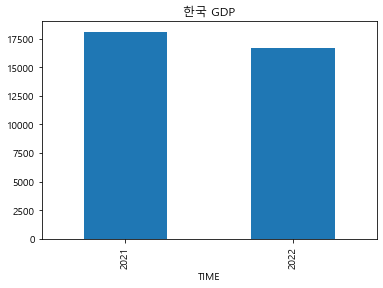

In [164]:
pd.to_numeric(ser).plot(kind='bar', title="한국 GDP") # .plot()으로 그래프를 그릴 수 있습니다

In [57]:
import matplotlib.pyplot as plt
# Window의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac의 한글 폰트 설정
#plt.rc('font',family='AppleGothic')

<AxesSubplot:>

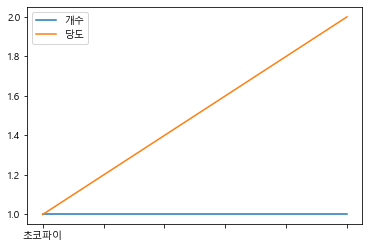

In [58]:
df.plot()

In [50]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False


In [ ]:
api_key = 'B9G993TGPZ8EMO1DY4L5'

url = 'http://ecos.bok.or.kr/api/StatisticSearch/{}/json/kr/1/10/200Y001/A/2021/2022/1010101'.format(api_key)
import requests
requests.get(url).json()

In [6]:
import requests
import xml.etree.ElementTree as ET
import xml.dom.minidom

## 호출하려는 OpenAPI URL를 정의합니다.
url = "http://ecos.bok.or.kr/api/StatisticsITemList/sample/xml/kr/1/1/1010101/"


self.base + 'StatisticSearch/' + self.Key \
              + '/json/kr/1/1/' + self.STAT_CODE + '/' + cycle + '/' \
              + date + '/' + date + '/' + self.ITEM_CODE1

In [ ]:
import requests

class Ecos:
    def __init__(self, Key, STAT_CODE, ITEM_CODE1, count):
        # count: StatisticItemList에서 ITEM_CODE1이 STAT_CODE의 몇 번째 항목인지
        self.Key = Key
        self.STAT_CODE = STAT_CODE
        self.ITEM_CODE1 = ITEM_CODE1
        self.base = 'http://ecos.bok.or.kr/api/'
        self.count = count

    def getJSON(self, url):
        return requests.get(url).json()

    def getDate(self):  # 최근 일자 구하기
        url = self.base + 'StatisticItemList/' + self.Key \
              + '/json/kr/' + str(self.count) + '/' + str(self.count) \
              + '/' + self.STAT_CODE
        data = self.getJSON(url)
        return (data['StatisticItemList']['row'][0]['END_TIME'],
                data['StatisticItemList']['row'][0]['CYCLE'])

    def getLatest(self):  # 목표인 금리 데이터 구하기
        date, cycle = self.getDate()
        url = self.base + 'StatisticSearch/' + self.Key \
              + '/json/kr/1/1/' + self.STAT_CODE + '/' + cycle + '/' \
              + date + '/' + date + '/' + self.ITEM_CODE1
        data = self.getJSON(url)
        returnDict = {
            'date': date,
            'value': float(data['StatisticSearch']['row'][0]['DATA_VALUE'])
        }
        return returnDict

Key = ''

corpBondAAm = Ecos(Key, STAT_CODE='060Y001', ITEM_CODE1='010300000', count=19)
print(corpBondAAm.getLatest()) # {'date': '20201211', 'value': 2.215}
corpBondBBBm = Ecos(Key, STAT_CODE='060Y001', ITEM_CODE1='010320000', count=20)
print(corpBondBBBm.getLatest()) # {'date': '20201211', 'value': 8.626}

In [8]:
import requests
from bs4 import BeautifulSoup

xml = requests.get('http://ecos.bok.or.kr/api/StatisticSearch/sample/xml/kr/1/2/060Y001/DD/20201208/20201209/010300000/')
with open('asdf.txt', 'a+', encoding="UTF-8") as t:
    t.write(xml.text)

with open("asdf.txt") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

for row in soup.findAll('row'):
    print(row.time.text, row.data_value.text)


UnicodeDecodeError: 'cp949' codec can't decode byte 0xed in position 87: illegal multibyte sequence